In [1]:
import os 
os.chdir("../src")
print(os.getcwd())

import numpy as np
import pandas as pd
import gym
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.utils import io

from utils.ppo2_evaluator import PPO2Evaluator
from utils.load_confs import load_parameters, load_paths
from utils.viz_helpers import df_to_latex

%matplotlib inline
%load_ext autoreload
%autoreload 2

/u/clw4542/research/rl_ifo_mujoco/src


/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/scratch/cluster/clw4542/rlzoo/lib/python3.6/site-packages

In [38]:
params = load_parameters()
paths = load_paths()

ENV_IDS = [
           "Reacher-v2",
           "Swimmer-v2", 
           "Ant-v2", 
           "Hopper-v2", 
           "Walker2d-v2", 
           "HalfCheetah-v2"
          ]
RESULTS_DIR = paths['rl_demo']['results_dir']

## Core Figures

The purpose of this notebook is to evaluate results and generate visualizations for a paper

### PPO2 + Demo

In [17]:
def process_eval_data(env_expt_results:dict):
    '''We assume env_expt_results is a sub-dictionary of results produced by PPO2Evaluator on a specific environment, 
    for a specific experiment. The sub-dictionary should have the structure, env_expt_results[model_idx][timestep]    
    '''
    timesteps_list = []
    values_list = []
    for model_idx, model_idx_dict in env_expt_results.items():
        model_idx_name = list(model_idx_dict.keys())[0] # only one key
        learning_data = model_idx_dict[model_idx_name]
        kv_list = [(int(k), float(v)) for k, v in learning_data.items()]
        kv_list.sort(key=lambda x:x[0])
        k_list = [k for k, v in kv_list]
        v_list = [v for k, v in kv_list]
        timesteps_list.append(k_list)
        values_list.append(v_list)
        
    ts = np.array(timesteps_list)
    values = np.array(values_list)
    assert ts.shape[0] == len(list(env_expt_results.keys()))
    assert values.shape[0] == len(list(env_expt_results.keys()))

    ts = np.mean(ts, axis=0)
    values_mean = np.mean(values, axis=0)
    values_std = np.std(values, axis=0)
    return ts, values_mean, values_std

In [39]:
from rl_demo.evaluation import return_expt_params, evaluate_experiments
from reward_shaping.evaluate import return_expt_params as return_rew_expt_params
from reward_shaping.evaluate import evaluate_experiments as eval_rew_experiments

n_eval_seeds = params['eval']['seeds']

ppo2_results = {}
for env_id in ENV_IDS:
    expt_params = return_expt_params(env_id)
    ppo_demo_res = evaluate_experiments(env_id, n_eval_seeds, RESULTS_DIR, expt_params)
    
    rew_expt_params = return_rew_expt_params(env_id)
    ppo_rew_res = eval_rew_experiments(env_id, n_eval_seeds, RESULTS_DIR, rew_expt_params)
    
    ppo2_results[env_id] = {**ppo_demo_res, **ppo_rew_res}
    
ppo2_logs_dict = {env_id:{expt:(process_eval_data(env_expt_results)) for expt, env_expt_results in env_results.items()} for env_id, env_results in ppo2_results.items()}

Evaluating expt baseline_rl_hidden=64 for Reacher-v2
Found json for /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Reacher-v2_1. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Reacher-v2_1
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Reacher-v2_1/ppo2_Reacher-v2_seed=982_evaluation.json' mode='r' encoding='UTF-8'>
Found json for /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Reacher-v2_2. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Reacher-v2_2
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Reacher-v2_2/ppo2_Reacher-v2_seed=108_evaluation.json' mode='r' encoding='UTF-8'>
Found json for /scratch/clust

Found json for /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Swimmer-v2_1. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Swimmer-v2_1
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Swimmer-v2_1/ppo2_Swimmer-v2_seed=982_evaluation.json' mode='r' encoding='UTF-8'>
Found json for /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Swimmer-v2_2. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Swimmer-v2_2
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Swimmer-v2_2/ppo2_Swimmer-v2_seed=108_evaluation.json' mode='r' encoding='UTF-8'>
Found json for /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=6

Found json for /scratch/cluster/clw4542/rl_demo_results_final/full_demo_huber_reward_displace-t=0_demo=sac_final/checkpoint/ppo2_Swimmer-v2_dist_std=25.073859190791964_alpha=0.1_gamma=1_imit_rew_coef=0.01_2. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/full_demo_huber_reward_displace-t=0_demo=sac_final/checkpoint/ppo2_Swimmer-v2_dist_std=25.073859190791964_alpha=0.1_gamma=1_imit_rew_coef=0.01_2
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/full_demo_huber_reward_displace-t=0_demo=sac_final/checkpoint/ppo2_Swimmer-v2_dist_std=25.073859190791964_alpha=0.1_gamma=1_imit_rew_coef=0.01_2/ppo2_Swimmer-v2_dist_std=25.073859190791964_alpha=0.1_gamma=1_0.01_2_seed=108_evaluation.json' mode='r' encoding='UTF-8'>
CKPT DIRNAME IS  ppo2_Swimmer-v2_dist_std=25.073859190791964_alpha=0.1_gamma=1_imit_rew_coef=0.01_3
Found json for /scratch/cluster/clw4542/rl_demo_results_final/full_demo_huber_reward_displace-t=0_demo=sac

Found json for /scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Ant-v2_1. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Ant-v2_1
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Ant-v2_1/ppo2_Ant-v2_seed=982_evaluation.json' mode='r' encoding='UTF-8'>
Found json for /scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Ant-v2_2. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Ant-v2_2
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Ant-v2_2/ppo2_Ant-v2_seed=108_evaluation.json' mode='r' encoding='UTF-8'>
Found json f

f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/full_demo_huber_reward_displace-t=0_demo=sac_final/checkpoint/ppo2_Ant-v2_dist_std=171.93150231680488_alpha=0.4_gamma=0.8_imit_rew_coef=0.3_5/ppo2_Ant-v2_dist_std=171.93150231680488_alpha=0.4_gamma=0.8_0.3_5_seed=1048_evaluation.json' mode='r' encoding='UTF-8'>
CKPT DIRNAME IS  ppo2_Ant-v2_dist_std=171.93150231680488_alpha=0.4_gamma=0.8_imit_rew_coef=0.3_6
CKPT DIRNAME IS  ppo2_Ant-v2_dist_std=171.93150231680488_alpha=0.4_gamma=0.8_imit_rew_coef=0.3_7
CKPT DIRNAME IS  ppo2_Ant-v2_dist_std=171.93150231680488_alpha=0.4_gamma=0.8_imit_rew_coef=0.3_8
Evaluating expt baseline_rl_hidden=64 for Hopper-v2
Found json for /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Hopper-v2_1. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_Hopper-v2_1
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl

Found json for /scratch/cluster/clw4542/rl_demo_results_final/full_demo_huber_reward_displace-t=0_demo=sac_final/checkpoint/ppo2_Hopper-v2_dist_std=26.245493994870102_alpha=1_gamma=0.9_imit_rew_coef=0.2_1. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/full_demo_huber_reward_displace-t=0_demo=sac_final/checkpoint/ppo2_Hopper-v2_dist_std=26.245493994870102_alpha=1_gamma=0.9_imit_rew_coef=0.2_1
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/full_demo_huber_reward_displace-t=0_demo=sac_final/checkpoint/ppo2_Hopper-v2_dist_std=26.245493994870102_alpha=1_gamma=0.9_imit_rew_coef=0.2_1/ppo2_Hopper-v2_dist_std=26.245493994870102_alpha=1_gamma=0.9_0.2_1_seed=982_evaluation.json' mode='r' encoding='UTF-8'>
CKPT DIRNAME IS  ppo2_Hopper-v2_dist_std=26.245493994870102_alpha=1_gamma=0.9_imit_rew_coef=0.2_2
Found json for /scratch/cluster/clw4542/rl_demo_results_final/full_demo_huber_reward_displace-t=0_demo=sac_final/che

Found json for /scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Walker2d-v2_2. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Walker2d-v2_2
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Walker2d-v2_2/ppo2_Walker2d-v2_seed=108_evaluation.json' mode='r' encoding='UTF-8'>
Found json for /scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Walker2d-v2_3. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Walker2d-v2_3
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/full_demo_aug_rl_displace-t=1_demo=sac/checkpoint/ppo2_Walker2d-v2_3/ppo2_Walker2d-v2_seed=329_evaluation.json'

Evaluating expt baseline_rl_hidden=64 for HalfCheetah-v2
Found json for /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_HalfCheetah-v2_1. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_HalfCheetah-v2_1
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_HalfCheetah-v2_1/ppo2_HalfCheetah-v2_seed=982_evaluation.json' mode='r' encoding='UTF-8'>
Found json for /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_HalfCheetah-v2_2. 
Loading from saved...
Reading saved values from /scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_HalfCheetah-v2_2
f is  <_io.TextIOWrapper name='/scratch/cluster/clw4542/rl_demo_results_final/baseline_rl_hidden=64/checkpoint/ppo2_HalfCheetah-v2_2/ppo2_HalfCheetah-v2_seed=108_evaluation.json' mode='r' encoding='U

In [40]:
%store ppo2_results
%store ppo2_logs_dict

Stored 'ppo2_results' (dict)
Stored 'ppo2_logs_dict' (dict)


#### Plots of PPO+demo versus Baseline

In [7]:
# random perf
random_perf = {'Reacher-v2': -43.1199222, 
               'HalfCheetah-v2': -282.7423069, 
               'Ant-v2': -54.35667815, 
               'Walker2d-v2': 0.55296615, 
               'Swimmer-v2': 1.4335161, 
               'Hopper-v2': 18.14677599}

# expert perf
expert_perf = {}
expert_average_perf = {}
for env in ["Reacher-v2", "Swimmer-v2", "Ant-v2", "Walker2d-v2", "Hopper-v2", "Swimmer-v2", "HalfCheetah-v2"]: 
    data = np.load(f"../data/expert_joint_angle_traj/original_init/joint_angles_sac.{env}.seed=None.npz")
    rew = data['rew']
    expert_perf[env] = rew

    data = np.load(f"../data/expert_full_traj/original_init/sac.{env}.seed=None.npz")
    expert_average_perf[env] = np.mean(data['ep_rets'])
    
display(random_perf)
display(expert_perf)
display(expert_average_perf)
%store random_perf
%store expert_perf
%store expert_average_perf

{'Reacher-v2': -43.1199222,
 'HalfCheetah-v2': -282.7423069,
 'Ant-v2': -54.35667815,
 'Walker2d-v2': 0.55296615,
 'Swimmer-v2': 1.4335161,
 'Hopper-v2': 18.14677599}

{'Reacher-v2': array(-1.14986092),
 'Swimmer-v2': array(146.58015019),
 'Ant-v2': array(6284.88158958),
 'Walker2d-v2': array(5940.55661373),
 'Hopper-v2': array(3851.98779776),
 'HalfCheetah-v2': array(12282.15422657)}

{'Reacher-v2': -4.44610456767987,
 'Swimmer-v2': 105.0921405698137,
 'Ant-v2': 6068.579720375406,
 'Walker2d-v2': 5724.123982401997,
 'Hopper-v2': 3614.2925763870617,
 'HalfCheetah-v2': 11900.94703180497}

Stored 'random_perf' (dict)
Stored 'expert_perf' (dict)
Stored 'expert_average_perf' (dict)


In [42]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
%matplotlib inline

legend_dict = {"raw_demo_aug_rl_displace-t=1_demo=sac": "ppo+demo w/joint angles",
               "full_demo_aug_rl_displace-t=1_demo=sac": "ppo+demo w/full state",
               "raw_demo_huber_reward_displace-t=0_demo=sac_final": "ppo shaped rew w/joint angles",
               "full_demo_huber_reward_displace-t=0_demo=sac_final": "ppo shaped rew w/full state",
               "baseline_rl_hidden=64": "ppo baseline"
 
              }
def plot_algo_with_demo(logs_dict, algo, env, eval_mode=False):
    '''the result should be a tuple of 2 lists, representing the x and y coords to plot'''
    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot()
    for label, result in logs_dict.items():
        time_idx, mean, std = result
        p = ax.plot(time_idx, mean, label=legend_dict[label])
        color = p[0].get_color()
        std = np.array(std)
        ax.fill_between(time_idx, mean-std/2, mean+std/2,
                        alpha=0.5, edgecolor=color, facecolor=color 
                       )
    ax.axhline(y=expert_perf[env], color='black', linestyle='--', label='expert demo ret')
    ax.axhline(y=expert_average_perf[env], color='gray', linestyle='--', label='expert avg ret')
    ax.axhline(y=random_perf[env], color='lightgray', linestyle='--', label='random ret')

    ax.legend(fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

    mode = "eval" if eval_mode else "learn"
    ax.set_title(f"{algo.upper()} on {env} (mode={mode})", fontsize=20)
    if eval_mode: 
        ax.set_ylabel("Mean Ep Rets \n(avg over 100 eps)", fontsize=16)
    else: 
        ax.set_ylabel("Mean Ep Rets", fontsize=16)
    ax.set_xlabel("Timesteps", fontsize=16)
    ax.xaxis.set_major_formatter(ticker.EngFormatter())

    plt.show()
    plt.close()

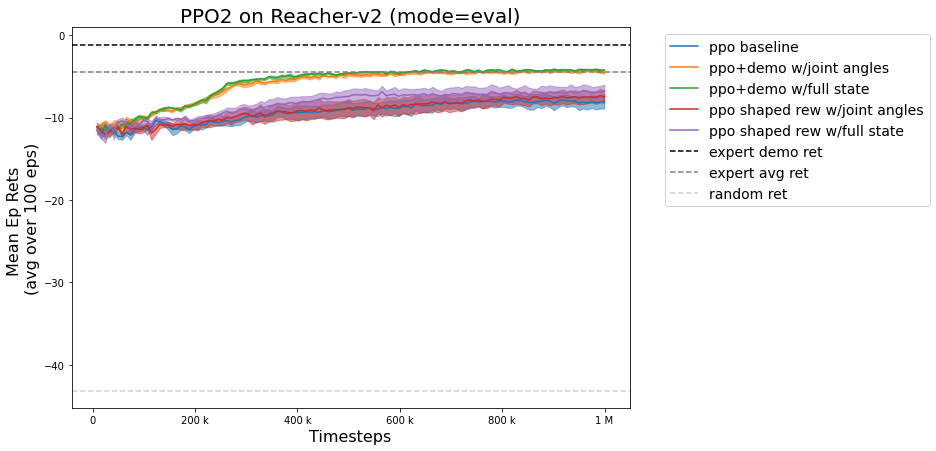

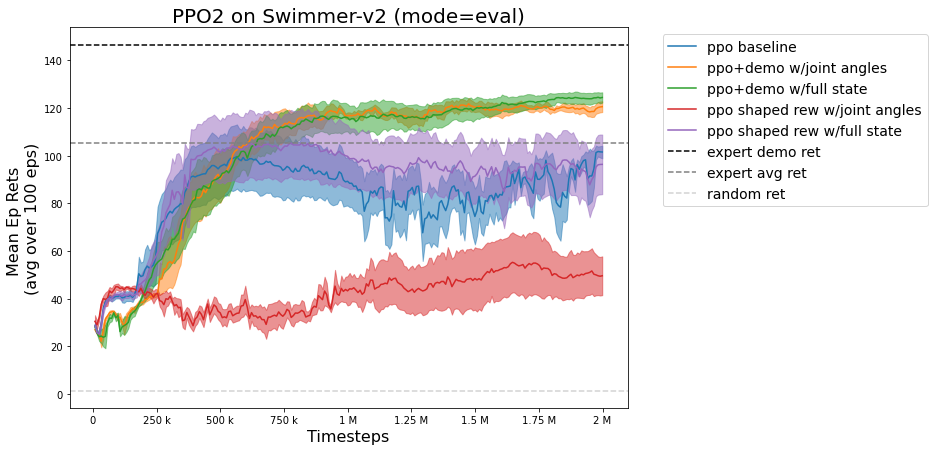

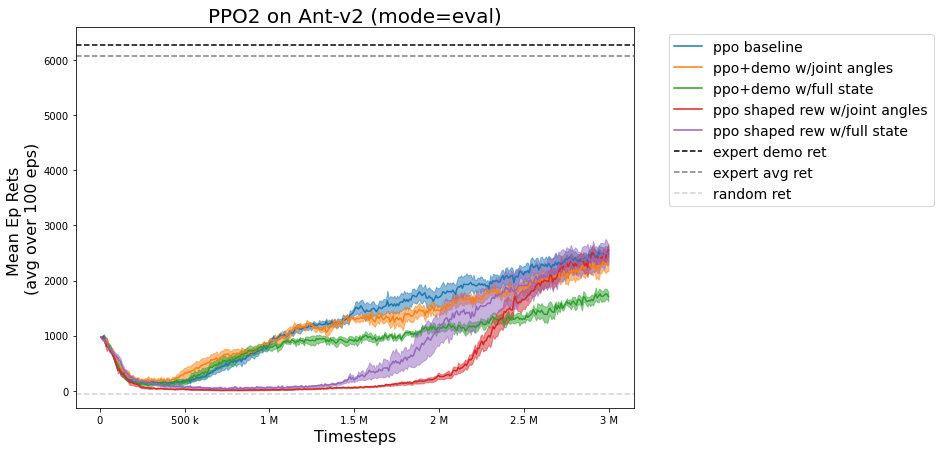

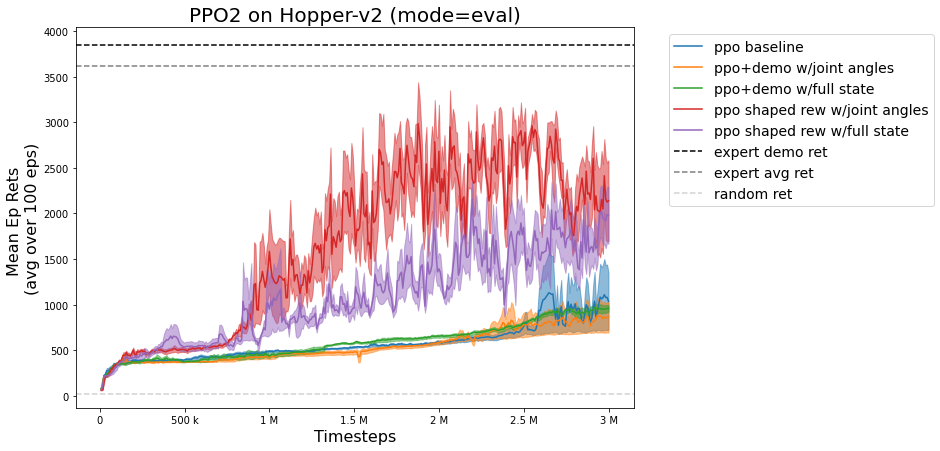

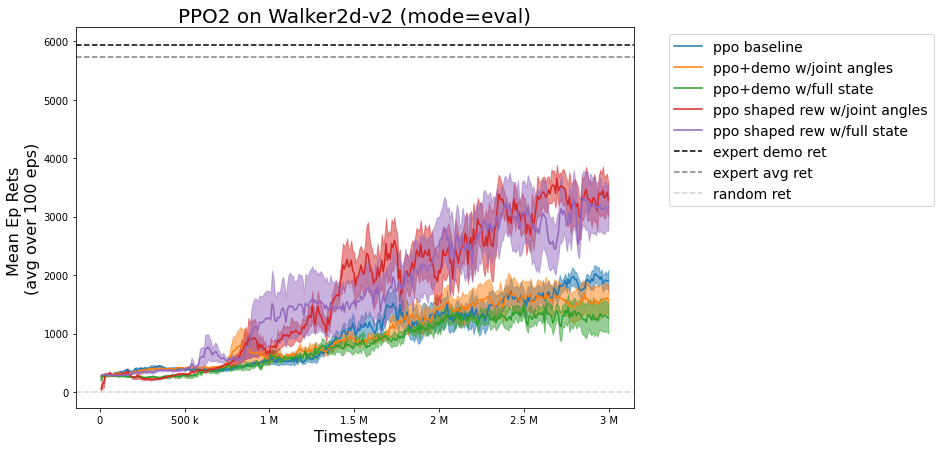

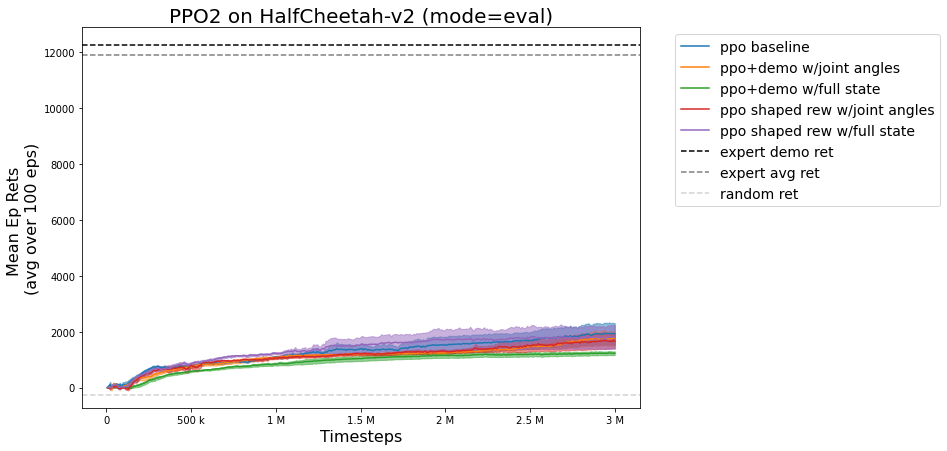

In [43]:
for env_id in ENV_IDS:
    plot_algo_with_demo(ppo2_logs_dict[env_id], algo='ppo2', env=env_id, eval_mode=True)

### Reward Shaping

##### Hyperparameter search

In [ ]:
from reward_shaping.hyperparam_search import rew_param_grid
from reward_shaping.evaluate_hyperparams import return_expt_params, evaluate_experiments
from sklearn.model_selection import ParameterGrid

n_valid_seeds = params['validation']['seeds']
results_dir = paths['rl_demo']['results_dir']
param_grid = ParameterGrid(rew_param_grid)

hyperparam_results = {}
for env_id in ENV_IDS:
    expt_params = return_expt_params(env_id)
    hyperparam_results[env_id] = evaluate_experiments(env_id, n_valid_seeds, results_dir, expt_params)

In [13]:
def process_hyperparam_data(hyperparam_results:dict):
    '''We assume env_expt_results is a sub-dictionary of results produced by PPO2Evaluator on a specific environment, 
    for a specific experiment. The sub-dictionary should have the structure, env_expt_results[model_idx][timestep]    
    '''
    processed_dict = {}
    for expt in [
        "raw_demo_huber_reward_displace-t=0_demo=sac",
        "full_demo_huber_reward_displace-t=0_demo=sac"
                ]:
        processed_dict[expt] = {}
        for env_id in ENV_IDS:
            processed_dict[expt][env_id] = {}
            for key1, value_dict in hyperparam_results[env_id][expt].items():
                key2 = list(hyperparam_results[env_id][expt][key1].keys())[0]
                _, _, alpha, gamma, imit_rew_coef, model_idx, seed, _ = key2.split("_")                
                imit_rew_coef = f"imit-rew-coef={imit_rew_coef}"
                newkey = f"ppo2_{alpha}_{gamma}_{imit_rew_coef}"
                if not newkey in processed_dict[expt][env_id]:
                    processed_dict[expt][env_id][newkey] = []
                processed_dict[expt][env_id][newkey].append(hyperparam_results[env_id][expt][key1][key2]["None"])
#                 processed_dict[expt][env_id][f"ppo2_{alpha}_{gamma}_{imit_rew_coef}"][seed] = hyperparam_results[env_id][expt][key1][key2]["None"]
    # take mean
    for expt in [
        "raw_demo_huber_reward_displace-t=0_demo=sac",
        "full_demo_huber_reward_displace-t=0_demo=sac"
                ]:
        for env_id in ENV_IDS:
            for key in processed_dict[expt][env_id].keys():
                values_list = processed_dict[expt][env_id][key]
                processed_dict[expt][env_id][key] = np.mean(values_list) # take avg across all seeds 
    return processed_dict 

processed_dict = process_hyperparam_data(hyperparam_results)

In [14]:
raw_hyperparam_res = pd.DataFrame.from_dict(processed_dict['raw_demo_huber_reward_displace-t=0_demo=sac'], orient='columns')
for env_id in ENV_IDS:
    print(f"{env_id}\t{raw_hyperparam_res[env_id].idxmax()}\t{raw_hyperparam_res[env_id].max()}")

Reacher-v2	ppo2_alpha=0.99_gamma=0.9_imit-rew-coef=0.01	-5.719020430253601
Swimmer-v2	ppo2_alpha=0.6_gamma=0.01_imit-rew-coef=0.2	130.89240482857704
Ant-v2	ppo2_alpha=0.7_gamma=0.5_imit-rew-coef=0.3	2547.245875576639
Hopper-v2	ppo2_alpha=0.01_gamma=0.4_imit-rew-coef=0.4	3113.601534961061
Walker2d-v2	ppo2_alpha=0.5_gamma=0.3_imit-rew-coef=0.4	3076.716582627249
HalfCheetah-v2	ppo2_alpha=0.1_gamma=0.8_imit-rew-coef=0.1	3301.2554200498616


In [15]:
full_hyperparam_res = pd.DataFrame.from_dict(processed_dict['full_demo_huber_reward_displace-t=0_demo=sac'], orient='columns')
for env_id in ENV_IDS:
    print(f"{env_id}\t{full_hyperparam_res[env_id].idxmax()}\t{full_hyperparam_res[env_id].max()}")

Reacher-v2	ppo2_alpha=0.4_gamma=0.2_imit-rew-coef=0.01	-5.161609062486706
Swimmer-v2	ppo2_alpha=0.1_gamma=1_imit-rew-coef=0.01	116.29641907271976
Ant-v2	ppo2_alpha=0.4_gamma=0.8_imit-rew-coef=0.3	2372.9857105437236
Hopper-v2	ppo2_alpha=1_gamma=0.9_imit-rew-coef=0.2	1655.5698970283613
Walker2d-v2	ppo2_alpha=0.01_gamma=0.2_imit-rew-coef=0.3	3460.4568366231924
HalfCheetah-v2	ppo2_alpha=0.4_gamma=0.1_imit-rew-coef=0.1	2809.9060174371843
